Mean Squared Error (MSE): 0.49
Root Mean Squared Error (RMSE): 0.70
R-squared (R²): 0.62


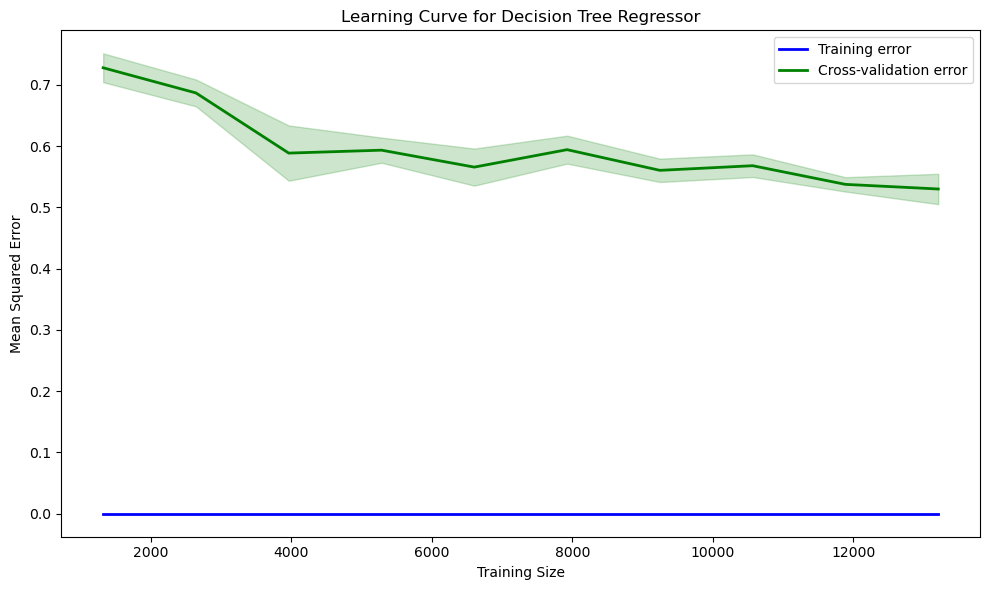

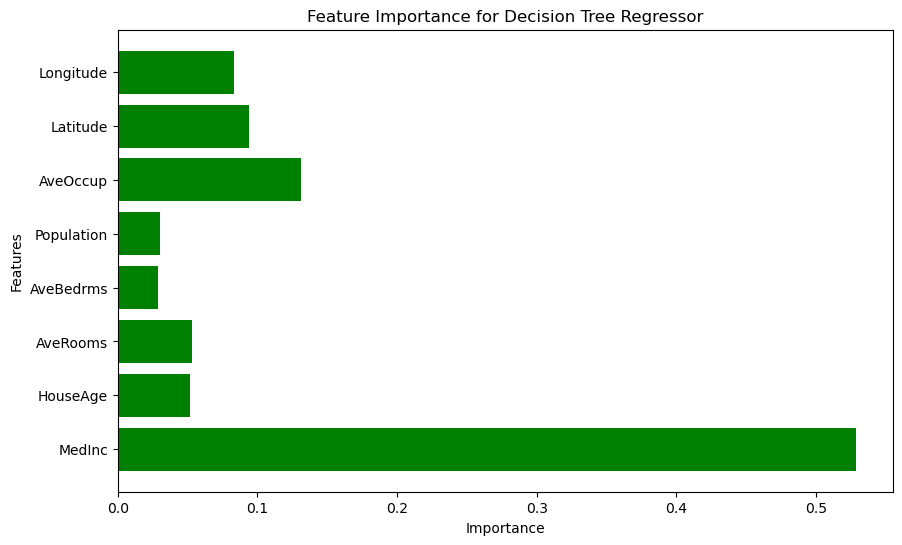

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Decision Tree Regressor model
dtr = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dtr.fit(X_train_scaled, y_train)

# Predict the housing prices for the test data
y_pred = dtr.predict(X_test_scaled)

# Calculate the model's performance metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Print performance metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

# Generate learning curves for the Decision Tree Regressor
train_sizes, train_scores, test_scores = learning_curve(dtr, X_train_scaled, y_train, cv=5, 
                                                        scoring='neg_mean_squared_error', 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and testing scores
train_scores_mean = -train_scores.mean(axis=1)  # Convert negative MSE to positive
test_scores_mean = -test_scores.mean(axis=1)  # Convert negative MSE to positive
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error', color='blue', lw=2)
plt.plot(train_sizes, test_scores_mean, label='Cross-validation error', color='green', lw=2)

# Add shaded areas for the standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 color='green', alpha=0.2)

# Add labels and title
plt.title('Learning Curve for Decision Tree Regressor')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')

# Show and save the plot
plt.tight_layout()
plt.savefig('learning_curve_california.png')  # Save the plot
plt.show()

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
feature_importance = dtr.feature_importances_
features = california.feature_names
plt.barh(features, feature_importance, color='green')
plt.title('Feature Importance for Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig('feature_importance_california.png')  # Save plot
plt.show()


In [ ]:
# GitHubRepo
https://github.com/Sahas-data/Machine_Learning.git